# 📊 Data Exploration and Visualization of the top languages used

Dataset is from: [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com)


## 📥 Import Statements


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 🗺️ Data Exploration


In [2]:
df = pd.read_csv("dataset.csv")
df.columns = ["DATE", "TAGS", "POSTS"]

In [3]:
# first 5 rows

df.head()

,DATE,TAGS,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
# last 5 rows

df.tail()

,DATE,TAGS,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [5]:
# shape of the dataset (row, column)

df.shape

(1991, 3)

In [6]:
# number of values for each column

df.count()

DATE     1991
TAGS     1991
POSTS    1991
dtype: int64

In [7]:
# total number of posts per language

df.groupby("TAGS").sum()

,DATE,POSTS
TAGS,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.


In [8]:
# number of months/rows each programming language appears in

df.groupby("TAGS").count()

,DATE,POSTS
TAGS,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## 🧹 Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"


In [9]:
# data looks like this before updating

df["DATE"][1]

'2008-08-01 00:00:00'

In [10]:
# data type of date before

type(df["DATE"][1])

str

In [11]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAGS,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [12]:
# data type of date after

type(df["DATE"][1])

pandas._libs.tslibs.timestamps.Timestamp

## 🔮 Data Manipulation

-   We are pivoting the original data frame. In the reshaped data frame, the columns will represent `TAGS` (programming languages) and the rows will represent the `DATE`


In [13]:
reshaped_df = df.pivot(columns="TAGS", index="DATE", values="POSTS")

In [14]:
# first 5 rows of reshaped data frame

reshaped_df.head()

TAGS,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [15]:
# shape of the reshaped df (row, column)

reshaped_df.shape

(145, 14)

In [16]:
# columns of the reshaped df (all the programming languages)

reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAGS')

Count the number of entries per programming language. Why might the number of entries be different?

-   Because there are many cells filled with `NaN`. We have to clean them.


In [17]:
reshaped_df.count()

TAGS
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [18]:
# check if there are any missing value before

reshaped_df.isna().values.any()

True

In [19]:
# fill 0 in place of NaN

reshaped_df.fillna(0, inplace=True)

In [20]:
reshaped_df.count()

TAGS
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [21]:
# check if there are any missing values after

reshaped_df.isna().values.any()

False

## 📈 Data Visualisaton with with Matplotlib


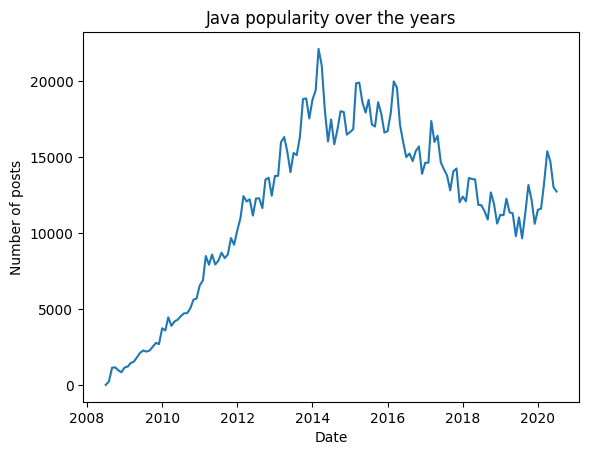

In [22]:
# popularity of java over the years

plt.plot(reshaped_df.index, reshaped_df["java"])
plt.title("Java popularity over the years")
plt.xlabel("Date")
plt.ylabel("Number of posts")
plt.show()

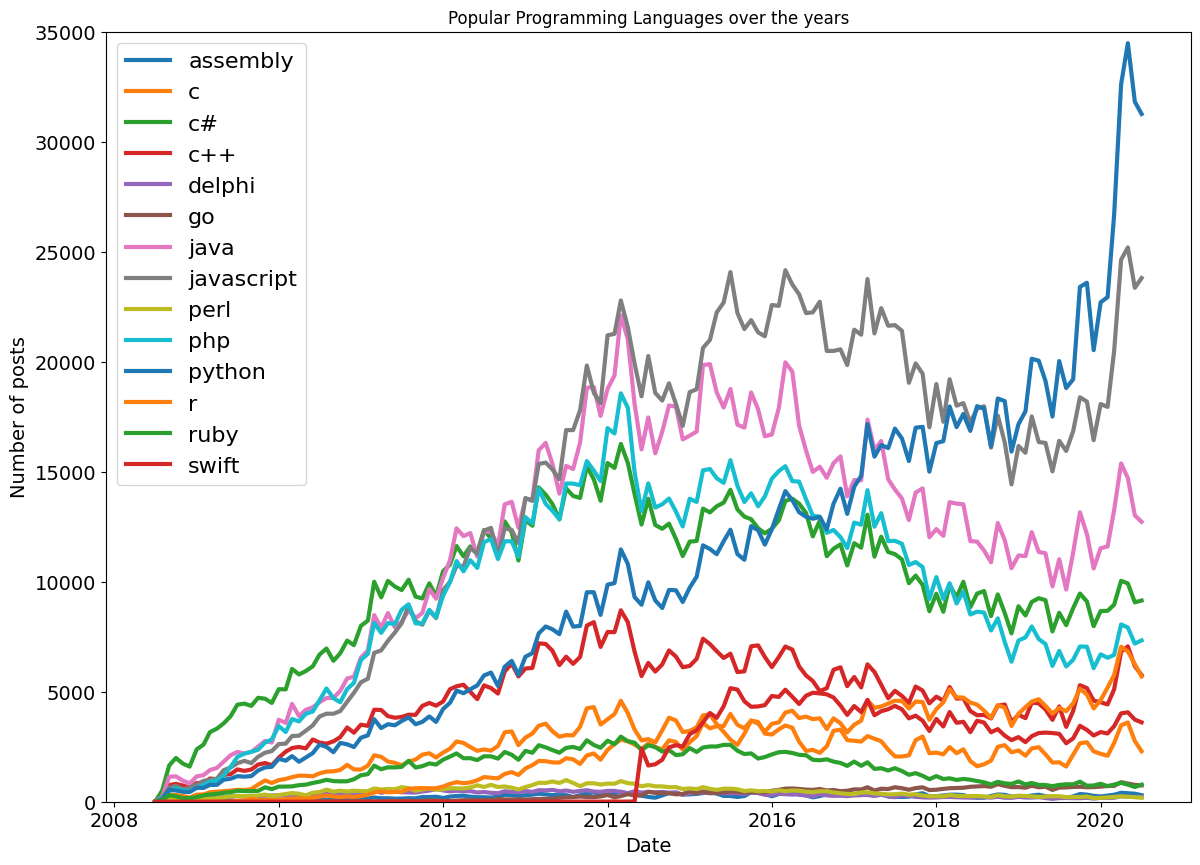

In [23]:
# popularity comparision of all programming languages over the years

plt.figure(figsize=(14, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.title("Popular Programming Languages over the years")
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(
        reshaped_df.index,
        reshaped_df[column],
        linewidth=3,
        label=reshaped_df[column].name,
    )
plt.legend(fontsize=16)
plt.show()

# 🧼 Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: `rolling()` and `mean()`.


In [24]:
roll_df = reshaped_df.rolling(window=6).mean()

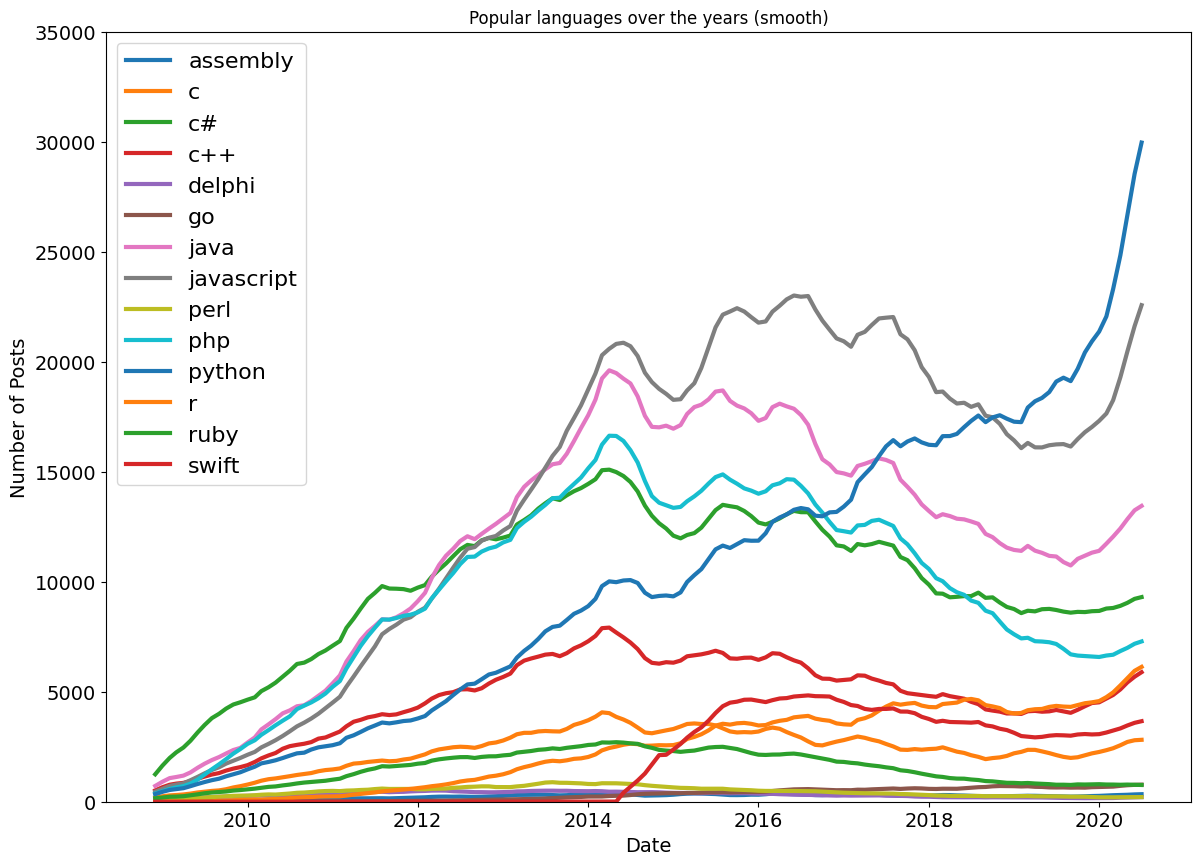

In [25]:
plt.figure(figsize=(14, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Popular languages over the years (smooth)")
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)
plt.show()